<a href="https://colab.research.google.com/github/GitAnnaV/IIS/blob/main/LP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Тема: Кластеризация (метод k-средних)

Вариант 124

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
data = np.array([[0.98646576, 5.51913649],
                 [6.656122, 1.32179868],
                 [13.60477793, 10.893459],
                 [8.07878556, 1.3718204],
                 [8.57899244, 1.47117364],
                 [11.99218844, 10.00278782],
                 [13.67976969, 11.85890877],
                 [12.19374903, 10.58436694],
                 [13.55191111, 13.96586486],
                 [1.5781104, 5.44062481],
                 [2.54998842, 5.44290953],
                 [7.53947816, 1.97682327],
                 [7.77573917, 1.68741545],
                 [7.40382337, 1.61830924],
                 [13.41401174, 11.48837435],
                 [12.30343385, 11.38964818],
                 [11.90342996, 12.60480311],
                 [12.97102516, 12.80274314],
                 [-0.07186881, 5.86578557],
                 [2.26956487, 4.90899589],
                 [2.14966222, 5.95087446],
                 [7.08068989, 1.74118832],
                 [-1.04242483, 6.15611081],
                 [7.1638765, 1.55096862],
                 [2.73191408, 5.31414116],
                 [0.14906354, 5.22115529],
                 [1.82965708, 5.14288032],
                 [7.89212069, 2.29383977],
                 [12.43004693, 14.14097804],
                 [7.60045453, 2.2328528]])

Определение достаточного количества кластеров методом Elbow:

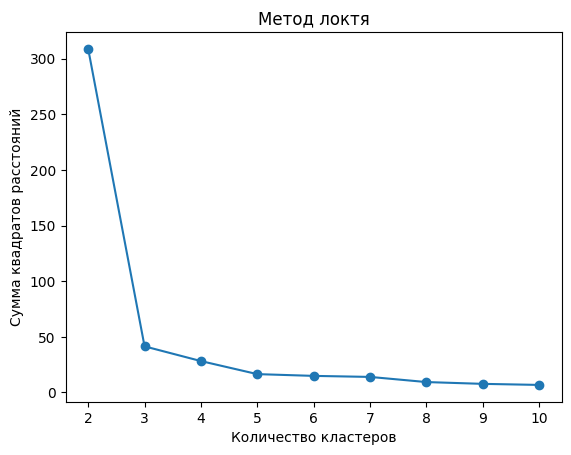

' На графике чётко виден "локоть" при k=3, после 3 кластеров уменьшение инерции значительно замедляется. Добавление 4 и последующих кластеров даёт минимальное улучшение '

In [13]:
# Список для сохранения значений инерции (сумма квадратов расстояний от точек до ближ. центроидов)
inertia_values = []

# Перебираем количество кластеров от 2 до 10 (включительно), начинаем с 2, т.к. 1 - тривиальный случай
for k in range(2,11):

  # Объект KMeans с текущим количеством кластеров
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(data)
  # Сохраняем значение инерции - мерой компактности кластеров.
  # Он вычисляется как сумма квадратов расстояний между каждым объектом данных и центроид
  inertia_values.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel("Количество кластеров")
plt.ylabel("Сумма квадратов расстояний")
plt.title("Метод локтя")
plt.show()


''' На графике чётко виден "локоть" при k=3, после 3 кластеров уменьшение инерции значительно замедляется. Добавление 4 и последующих кластеров даёт минимальное улучшение '''

Метки кластеров:
[2 0 1 0 0 1 1 1 1 2 2 0 0 0 1 1 1 1 2 2 2 0 2 0 2 2 2 0 1 0]
Координаты центроидов кластеров:
[[ 7.57700823  1.72661902]
 [12.80443438 11.97319342]
 [ 1.31301327  5.49626143]]
f:В кластере с меткой {v} содержится {np.sum(label == v)} точек
f:В кластере с меткой {v} содержится {np.sum(label == v)} точек
f:В кластере с меткой {v} содержится {np.sum(label == v)} точек


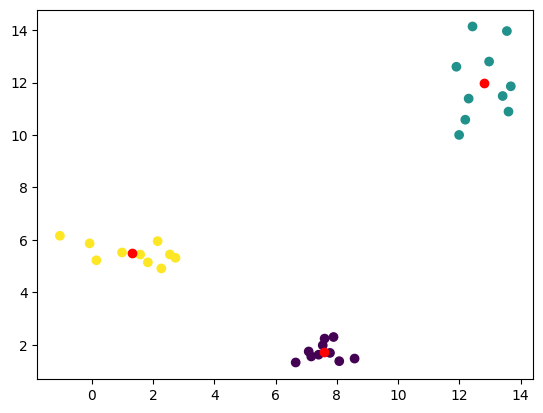

In [17]:
kmeans = KMeans(n_clusters=3)

# Кластеризация данных
kmeans.fit(data)

# Метки кластеров для каждого объекта
labels = kmeans.labels_

# Координаты центроидов
centroids = kmeans.cluster_centers_
print("Метки кластеров:")
print(labels)

print("Координаты центроидов кластеров:")
print(centroids)

labelNum = np.unique(labels)
for v in labelNum:
  print("f:В кластере с меткой {v} содержится {np.sum(label == v)} точек")

plt.scatter(data[:,0], data[:,1], c = labels )
plt.scatter(centroids[:,0], centroids[:,1], c = "r")
plt.show()